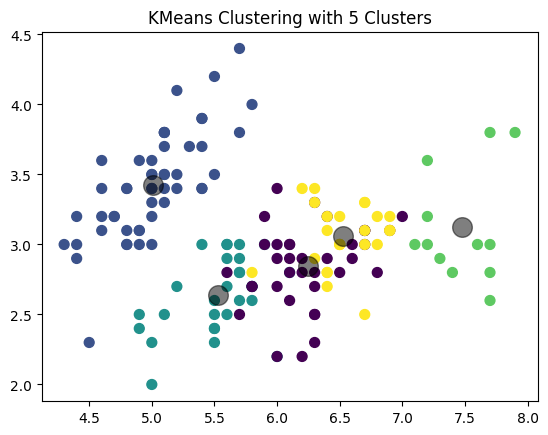

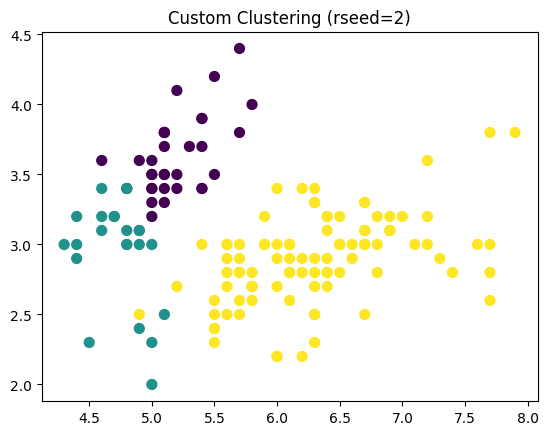

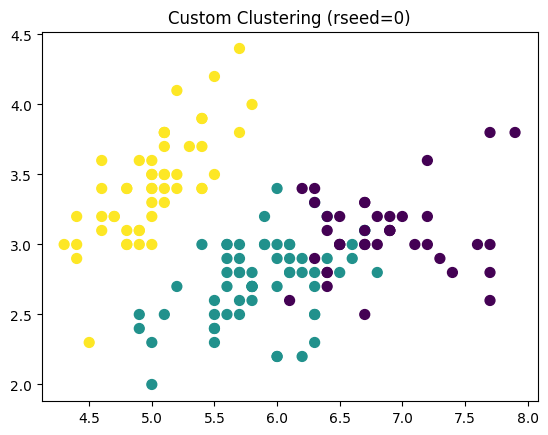

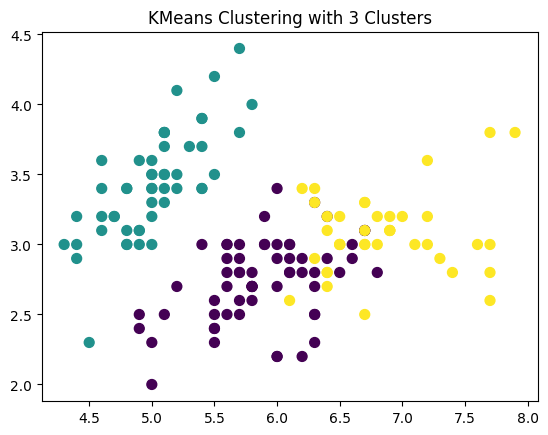

In [6]:
from sklearn.cluster import KMeans  # Додано імпорт KMeans
from sklearn.metrics import pairwise_distances_argmin

import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Завантаження даних Iris
iris = load_iris()
X = iris['data']
y = iris['target']

# Використання KMeans з n_clusters=5
kmeans = KMeans(n_clusters=5, random_state=42)  # Додано random_state для відтворюваності
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Побудова графіку кластерів
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title("KMeans Clustering with 5 Clusters")
plt.show()

# Визначення функції find_clusters
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        # Призначення міток за відстанями до центрів
        labels = pairwise_distances_argmin(X, centers)
        # Перерахунок центрів
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        # Перевірка на зупинку
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

# Застосування find_clusters
centers, labels = find_clusters(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Custom Clustering (rseed=2)")
plt.show()

centers, labels = find_clusters(X, 3, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Custom Clustering (rseed=0)")
plt.show()

# Порівняння з KMeans
labels = KMeans(3, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("KMeans Clustering with 3 Clusters")
plt.show()
